In [14]:
import os
import numpy as np

from event_display import  table_display_compare
from data_tools import reduce_9cells 

In [15]:
pics_prefix = os.path.join("plots", "v1_")

In [16]:
from geant3_parser import build_true_answers_train_set
from geant3_parser import Geant3DataFile

def norm_func(e):
    return np.float64(np.log(e) / 11)

file_name = os.path.join('data', 'shower_geant3_new.dat')
data_file = Geant3DataFile(file_name, skip_lines=3)

events_to_read = 5000
input_data, answers, values = build_true_answers_train_set(data_file, events_to_read*2, norm_func=norm_func, rnd_shift=((-2,2), (-2,2)))

# Remove x,y

# Reshape to events x 11 x 11 x 1 form
input_data = np.reshape(input_data, (len(input_data), 11, 11, 1))  # -1 => autodetermine
answers = np.reshape(answers, (len(answers), 11, 11, 1))  # -1 => autodetermine

# Pad with 1 row and column of zeroes, so it divides by 2, events x 12 x 12 x 1 now
input_data = np.pad(input_data, ((0,0), (0,1), (0,1), (0,0)), mode='constant', constant_values=0)
answers = np.pad(answers, ((0,0), (0,1), (0,1), (0,0)), mode='constant', constant_values=0)

# printout shape
print(f"Inputs shape new = {np.shape(input_data)}")

Time open 0.27045631408691406
Time split 0.25612950325012207
Inputs shape new = (10000, 12, 12, 1)


(<Figure size 864x648 with 3 Axes>, <AxesSubplot:>, <AxesSubplot:>)

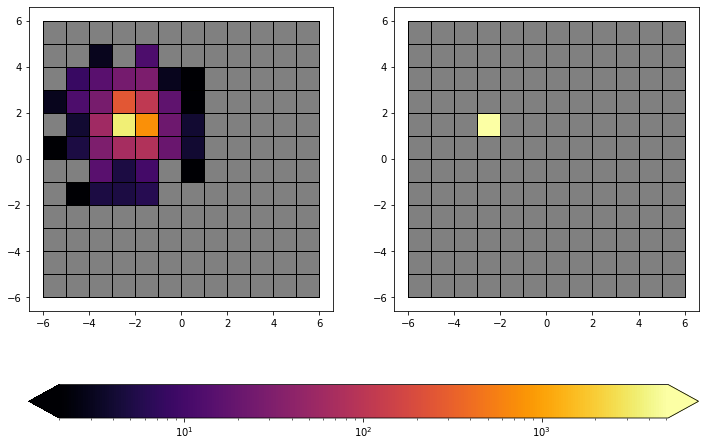

In [17]:
event_number = 12
left_event = np.exp(input_data[event_number]*11)
right_event = np.exp(answers[event_number]*11)
left_event[left_event<1.5] = 0
right_event[right_event<2] = 0
table_display_compare(left_event, right_event)


In [18]:
ench_events = np.copy(input_data)
for event in ench_events:
    reduce_9cells(event)

(<Figure size 864x648 with 3 Axes>, <AxesSubplot:>, <AxesSubplot:>)

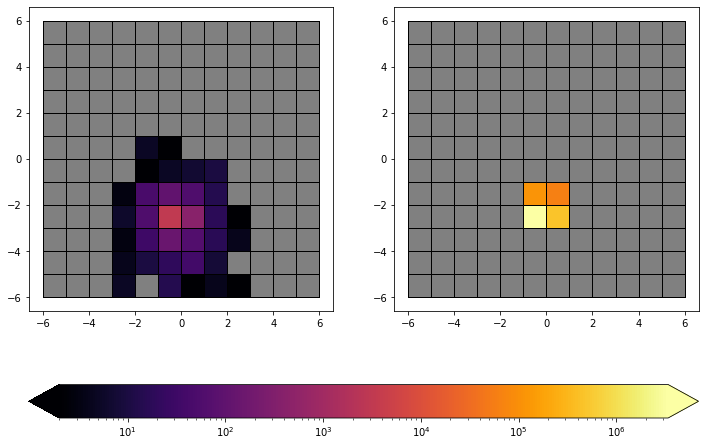

In [19]:
event_number = 11
left_event = np.exp(input_data[event_number]*11)
right_event = np.exp(ench_events[event_number]*11)
left_event[left_event<1.5] = 0
right_event[right_event<2] = 0
table_display_compare(left_event, right_event)